<a href="https://colab.research.google.com/github/RuslanFF1968/RuslanFF1968/blob/main/GeoPandas_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
import geopandas as geopandas
import matplotlib.pyplot as plt
import folium

# plt.rcParams["figure.dpi"]=200

In [ ]:
countries=geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
countries.head()

<ipython-input-3-b49e336baa57>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries=geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


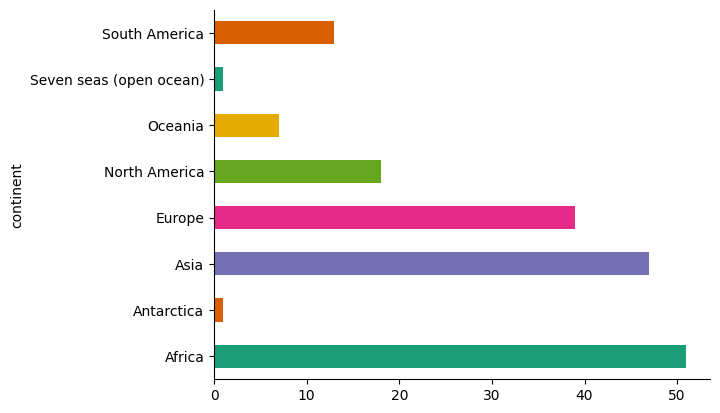

In [ ]:
# @title continent

from matplotlib import pyplot as plt
import seaborn as sns
countries.groupby('continent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

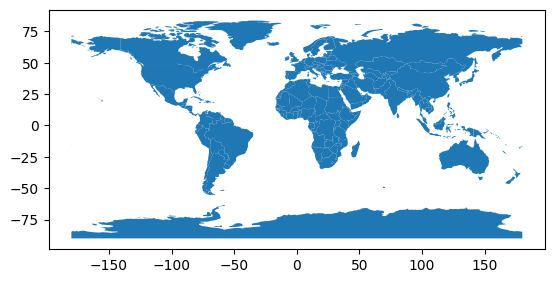

In [ ]:
countries.plot()

In [ ]:
# Data Structure
countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
countries.name

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: name, Length: 177, dtype: object

In [ ]:
countries.geometry

0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

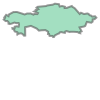

In [ ]:
countries.geometry[5]

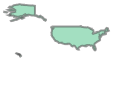

In [ ]:
countries.geometry[4]

<Axes: >

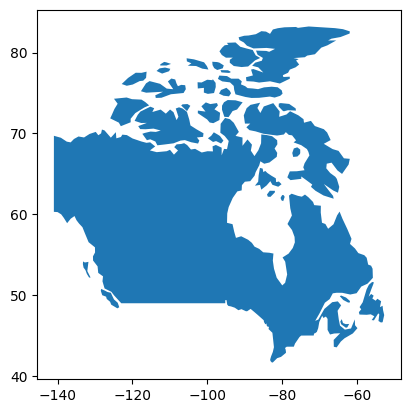

In [ ]:
countries.loc[countries['name']=="Canada"].plot()

In [ ]:
m = folium.Map([21, 89], zoom_start=6, tiles='Stamen Terrain')
folium.GeoJson(countries.to_json()).add_to(m)
m

In [ ]:
my_map=folium.Map(
    [26.5236, 85.6750],
    zoom_start=12,
    tiles='Stamen Terrain'
)

basemaps = {
    'Google Maps': folium.TileLayer(
        tiles='http://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr='Google',
        name='Google Maps',
        overlay = True,
        control = True
        ),
    'Google Satellite': folium.TileLayer(
        tiles='http://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr='Google',
        name='Google Maps',
        overlay = True,
        control = True
        ),
    'Google Terrain': folium.TileLayer(
        tiles='http://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr='Google',
        name='Google Maps',
        overlay = True,
        control = True
        ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles='http://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr='Google',
        name='Google Satellite',
        overlay = True,
        control = True
        ),
    'Esri Satellite': folium.TileLayer(
        tiles='http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr='Esri',
        name='Esri Satellite',
        overlay = True,
        control = True
    )
 }

basemaps['Google Satellite Hybrid'].add_to(my_map)
my_map

In [ ]:
from folium import plugins
my_map.add_child(folium.LayerControl())
plugins.Fullscreen().add_to(my_map)
plugins.LocateControl().add_to(my_map)
fmtr="function(num) {return L.Util.formatNum(num, 3) + ' º ';};"
plugins.MousePosition(position='topright', separator= ' | ', prefix="Mouse:", lat_formatter=fmtr, lng_formatter=fmtr).add_to(my_map)
plugins.Draw(export=True, filename='data.geojson', position='topleft', draw_options=None, edit_options=None).add_to(my_map)
plugins.MeasureControl(position='topright', primary_length_unit='meters', secondary_length_unit='miles', primary_area_unit='sqmeters', secondary_area_unit='acres')
my_map

In [ ]:
cities=geopandas.read_file(geopandas.datasets.get_path("naturalearth_cities"))
cities.head()

<ipython-input-15-fef3409f6e55>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities=geopandas.read_file(geopandas.datasets.get_path("naturalearth_cities"))


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


<Axes: >

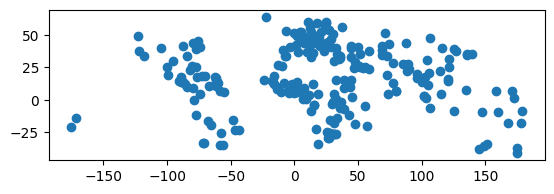

In [ ]:
cities.plot()

<Axes: >

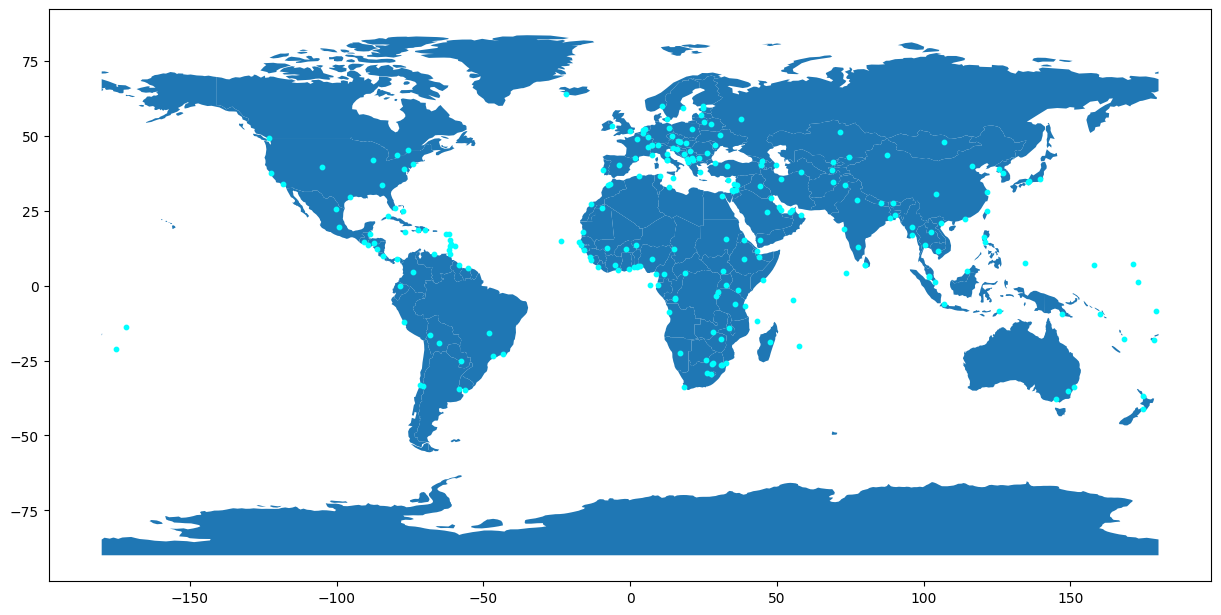

In [ ]:
ax=countries.plot(figsize=(15, 15))
cities.plot(ax=ax, color='cyan', markersize=10)

In [ ]:
m=folium.Map([21, 89], zoom_start=6, tiles='Stamen Terrain')
folium.GeoJson(countries.to_json()).add_to(m)
m

In [ ]:
m=folium.Map([21, 89], zoom_start=6, tiles='Stamen Toner')
folium.GeoJson(cities.to_json()).add_to(m)
m

In [ ]:
import plotly.express as px
fig = px.scatter_mapbox(cities, lat="name", lon="name", hover_name="name", hover_data=["name"], color="name", zoom=1, height=600, size="size", opacity=0.8, width=1300)
fig.update_layout(mapbox_style='stamen-terrain')
fig.update_layout(title_text='just a viz')
fig.show()

ValueError: Value of 'size' is not the name of a column in 'data_frame'. Expected one of ['name', 'geometry'] but received: size

In [ ]:
m=folium.Map([21, 89], zoom_start=6, tiles='Stamen Terrain')
folium.GeoJson(cities.to_json()).add_to(m)
m